In [1]:
import direction_transition as dit
import paths
from preprocessing import read_csv_clean

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/mPFC/Fentanyl Tx/Reversal/M1.CSV


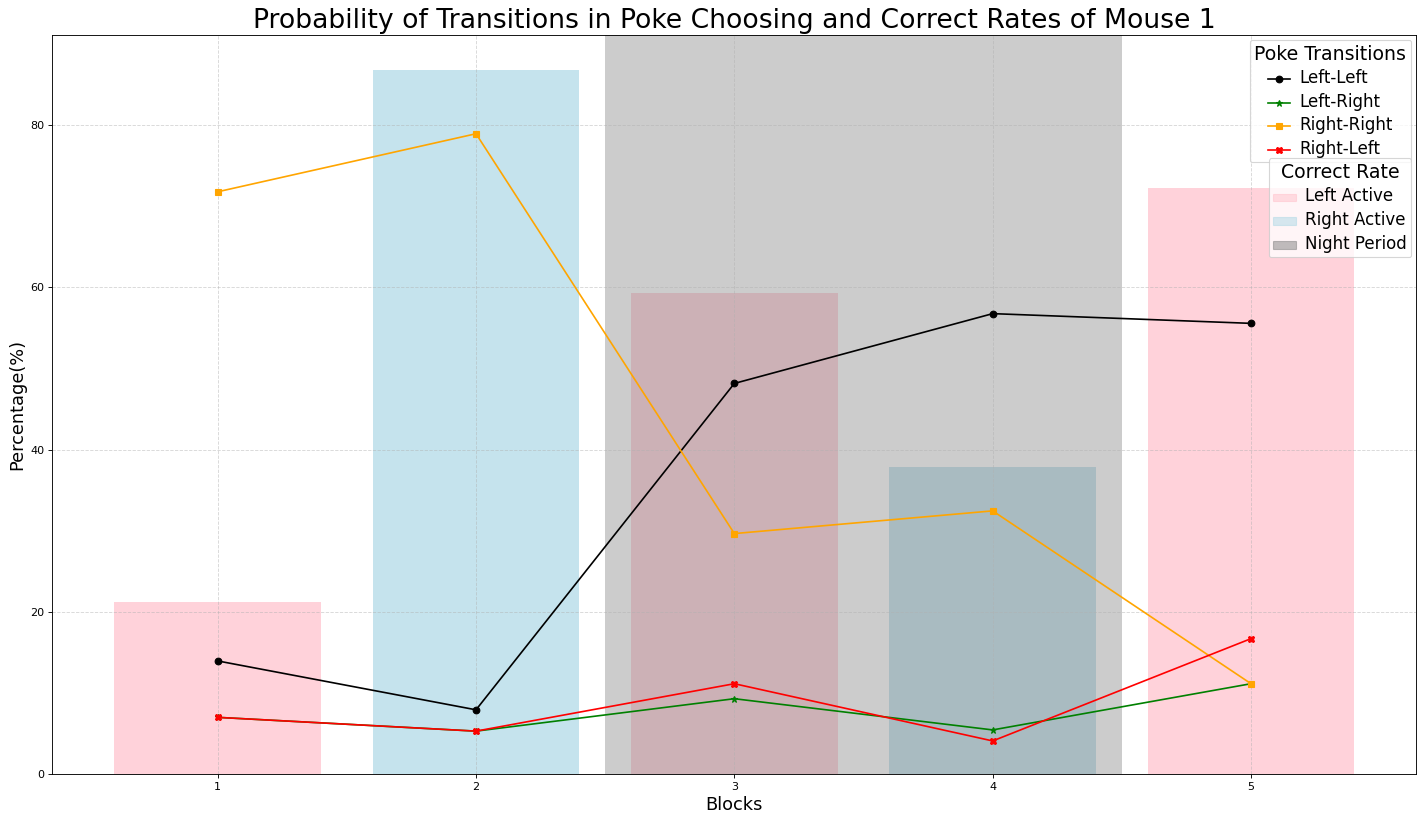

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/mPFC/Fentanyl Tx/Reversal/M2.CSV
/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/mPFC/Fentanyl Tx/Reversal/M3.csv


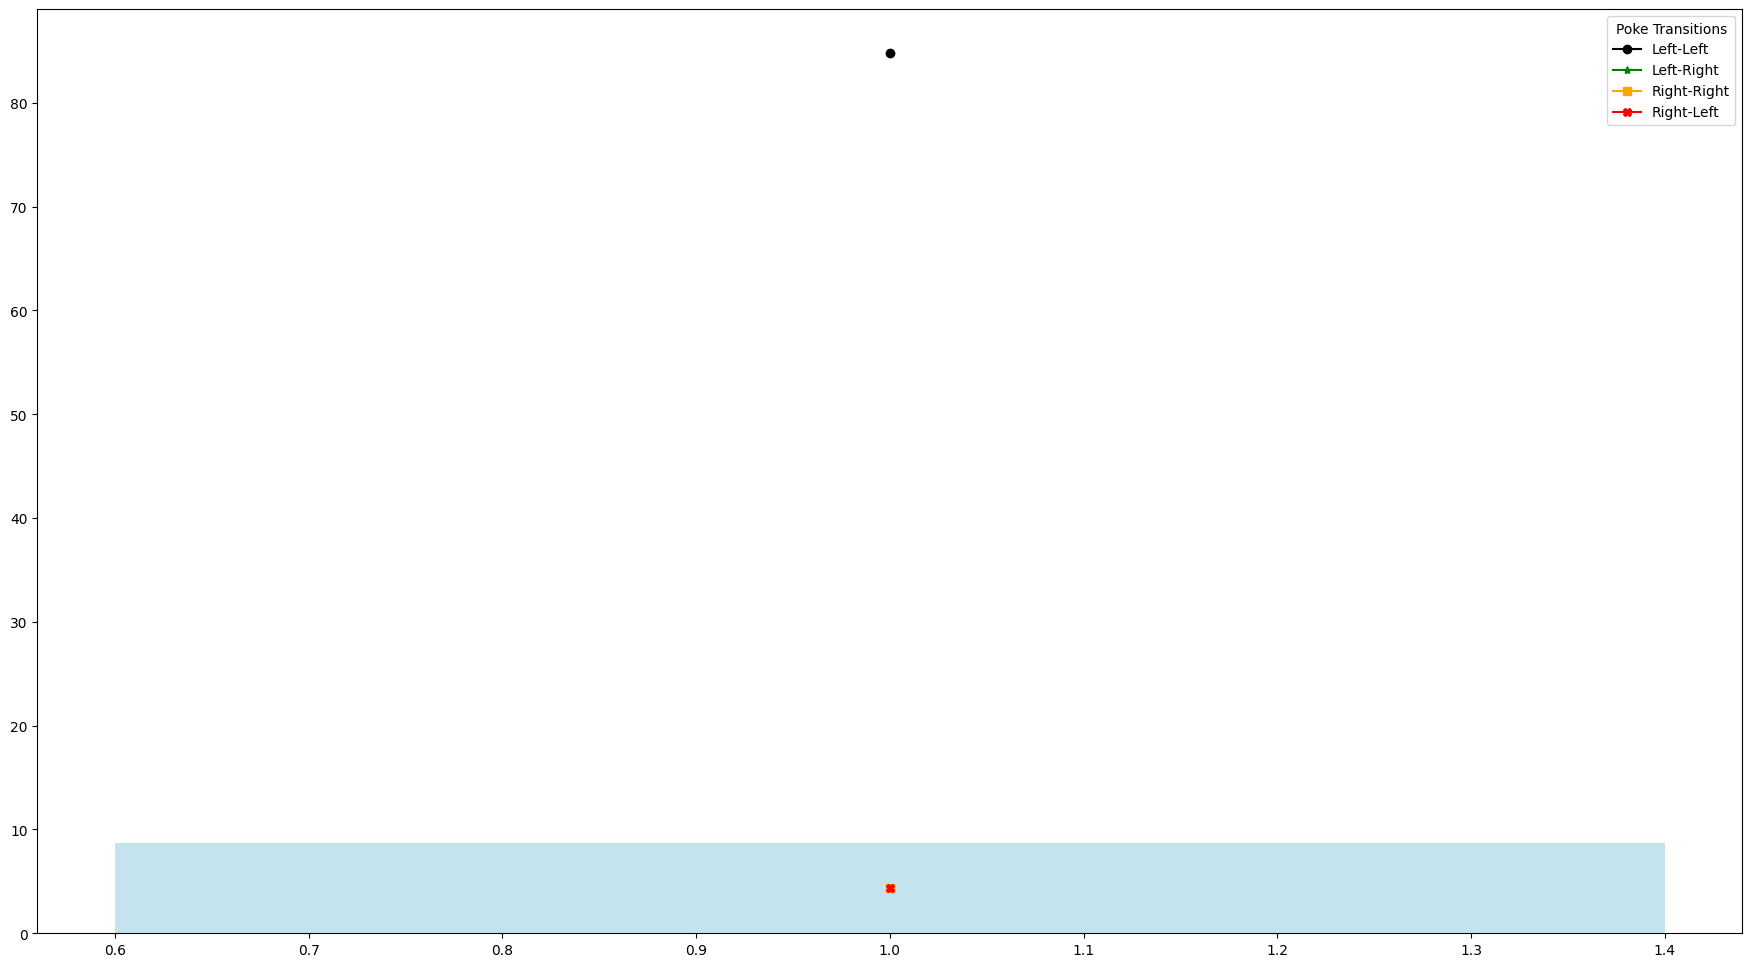

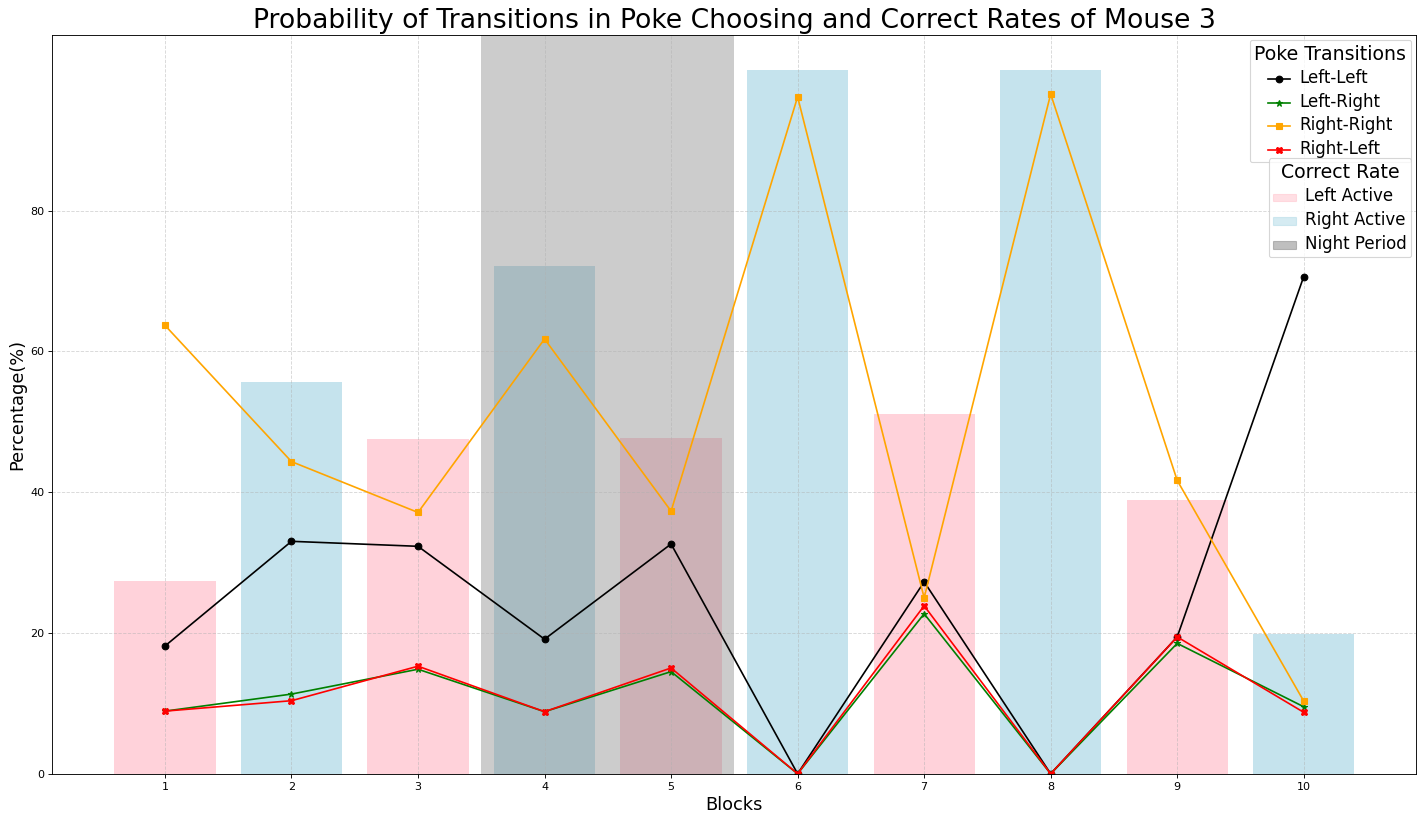

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/mPFC/Fentanyl Tx/Reversal/M4.CSV


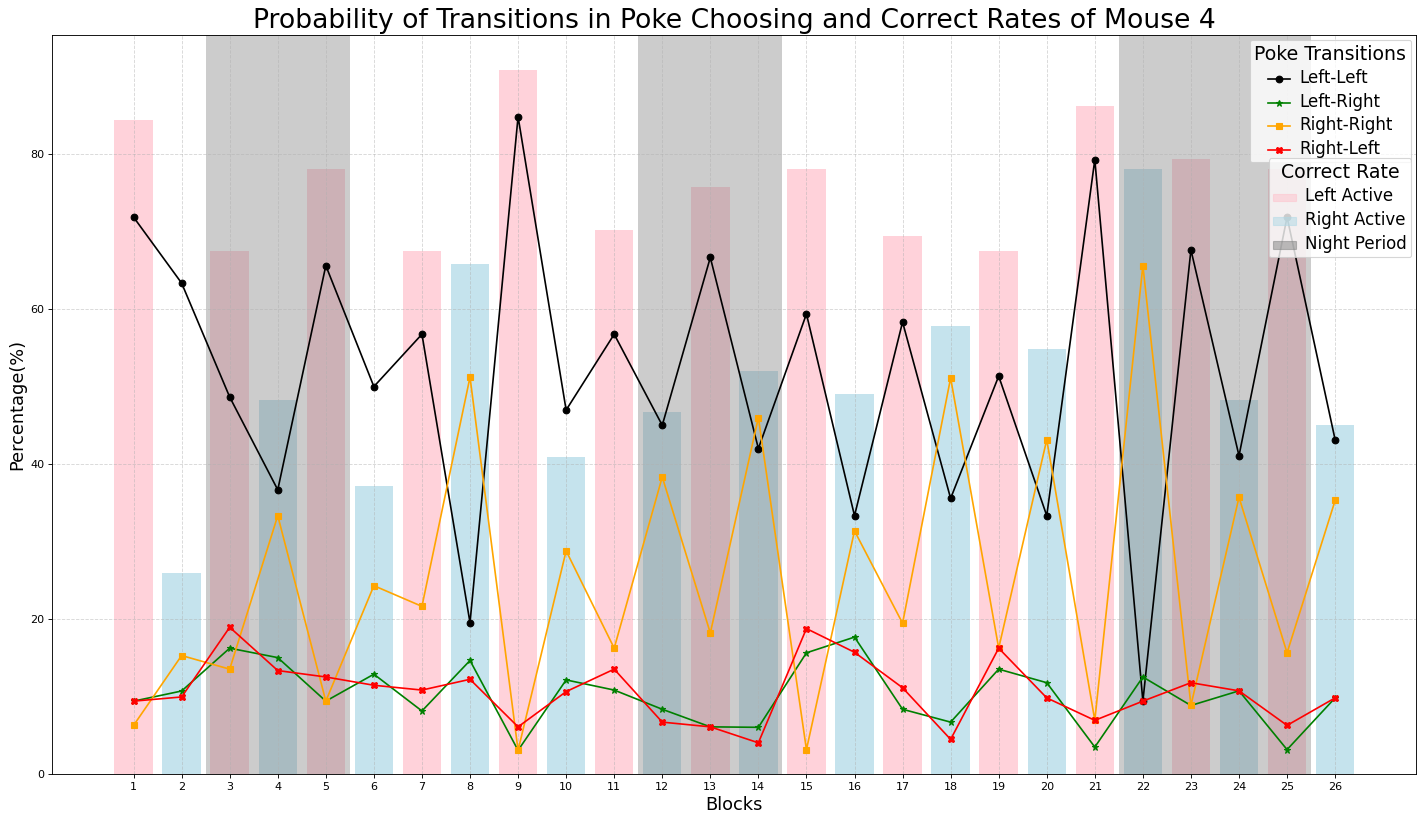

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/mPFC/Fentanyl Tx/Reversal/M5.CSV


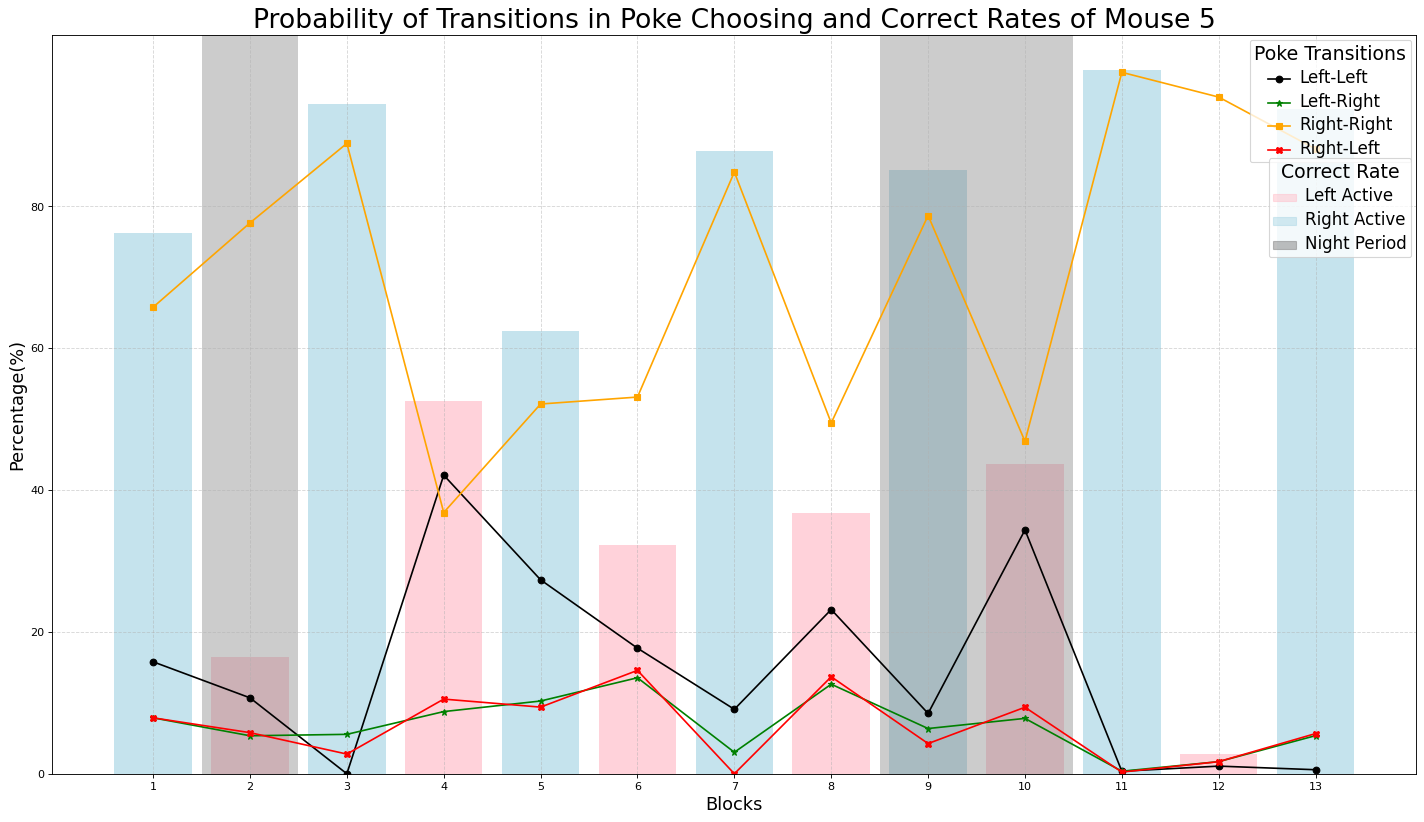

In [2]:
fent_scores = []

for path in paths.reversal_fent:
    print(path)
    data_dropped = read_csv_clean(path, remove_trivial=False)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    try:
        dit.graph_tranition_stats(data_stats, blocks, path)
    except:
        pass
    diff, left_start = dit.get_difference_key(data_stats)
    fent_scores.append(dit.learning_score_grad(diff, left_start))

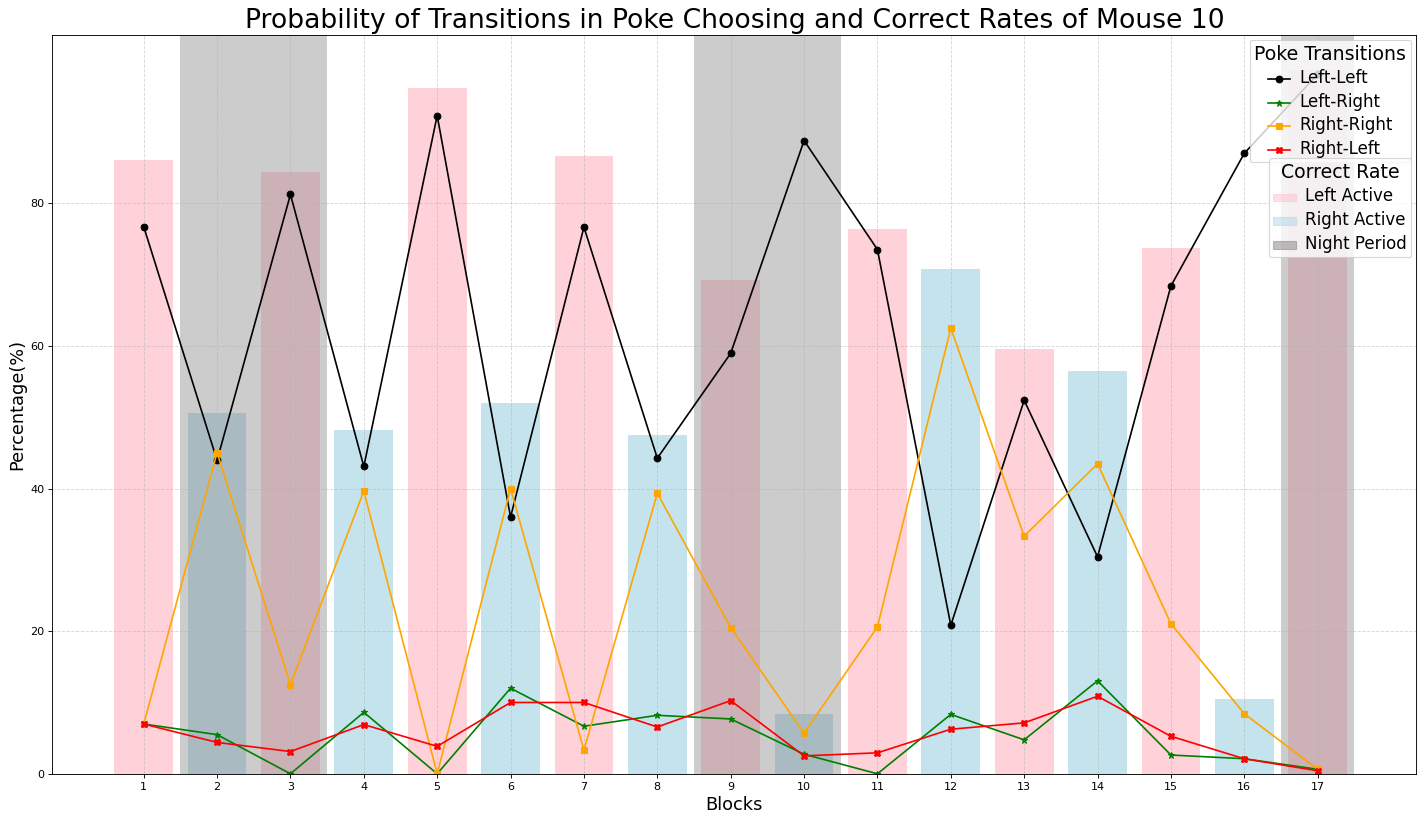

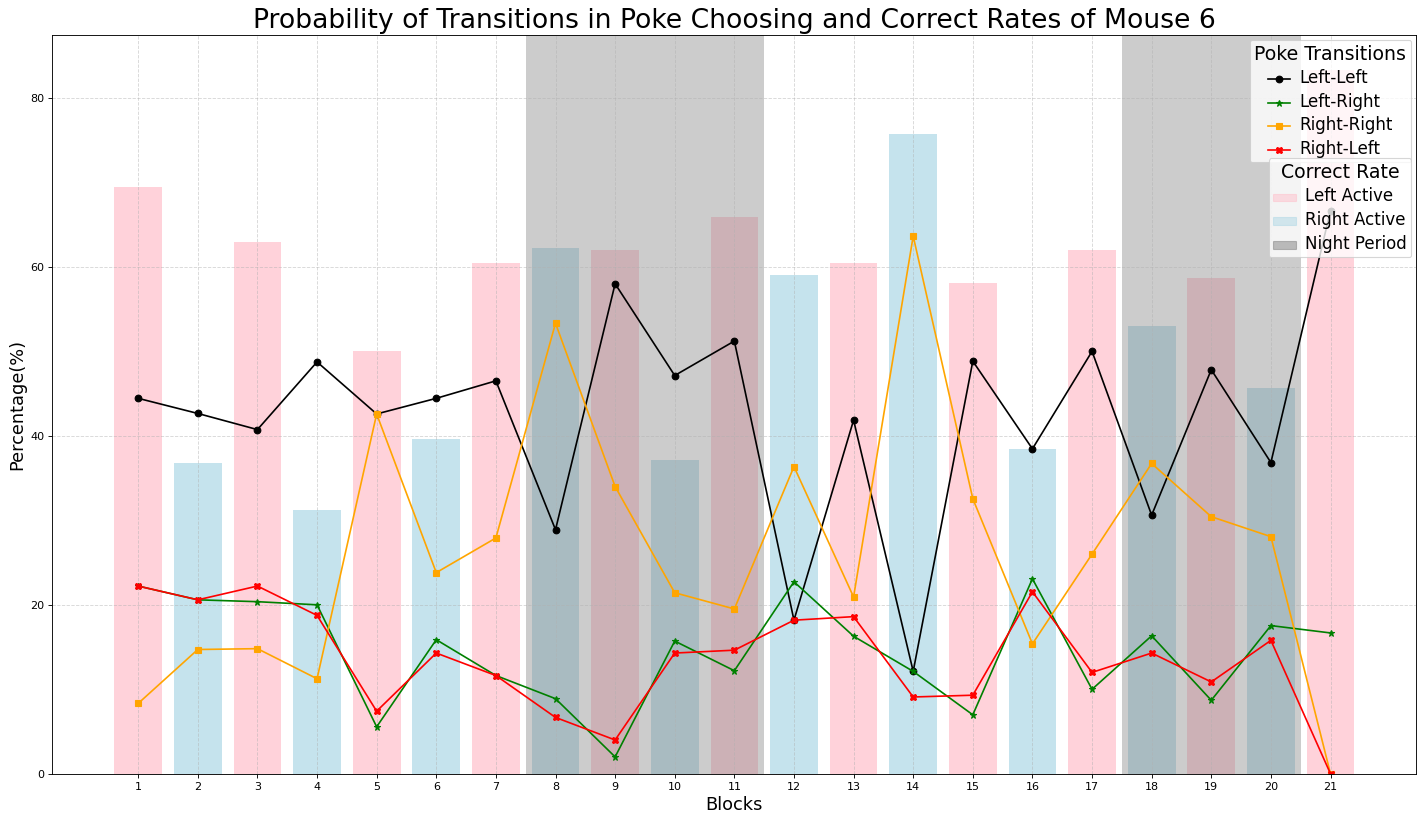

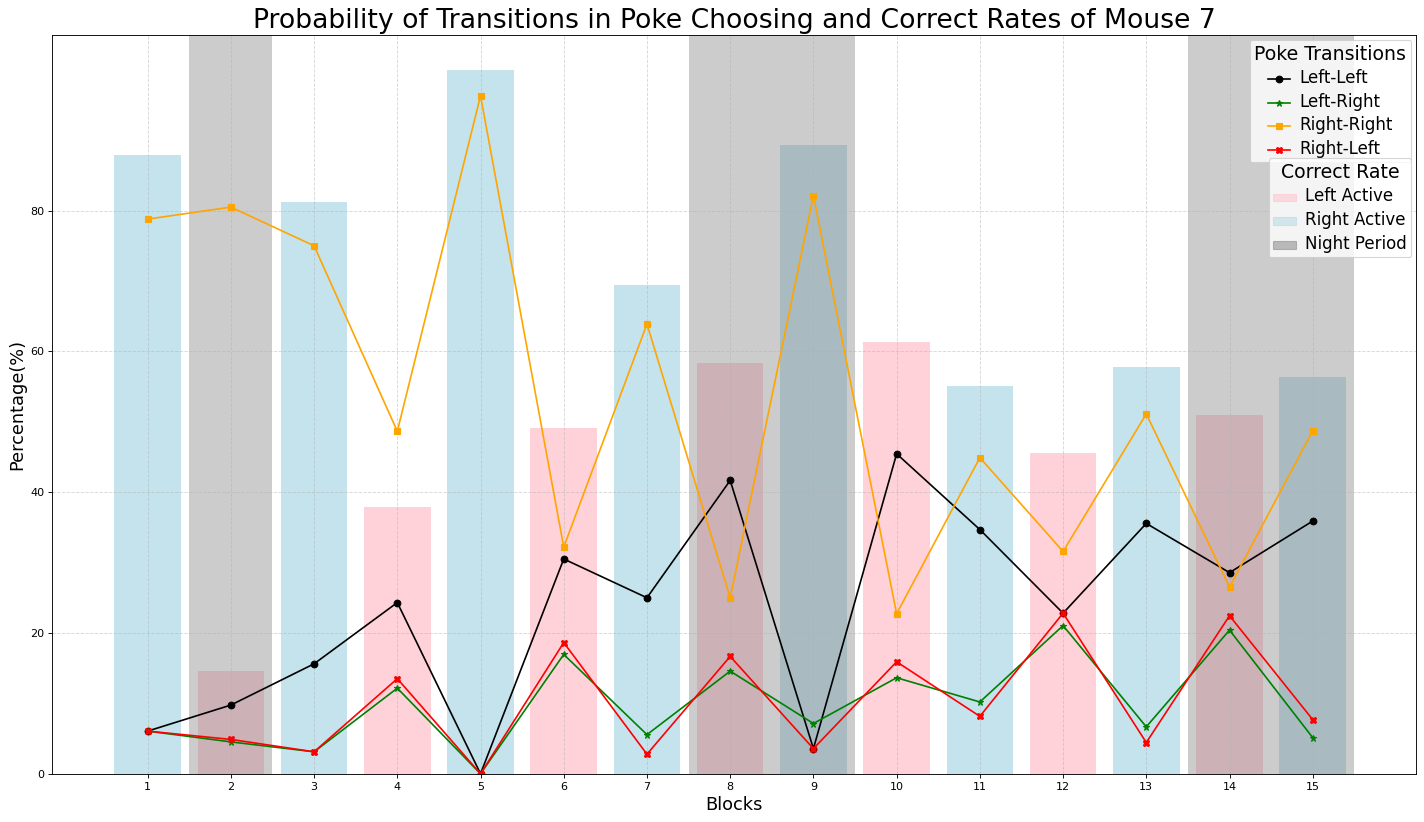

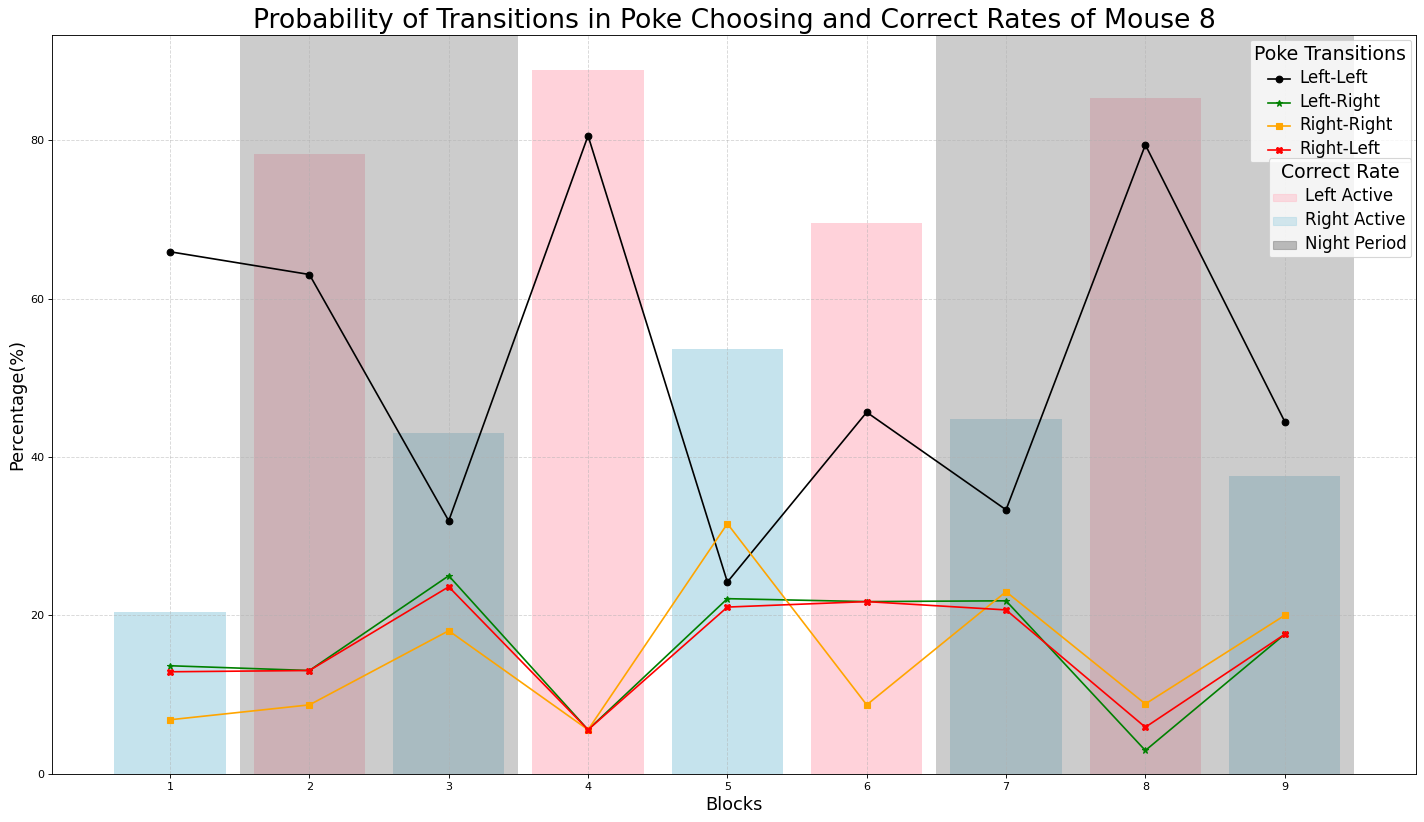

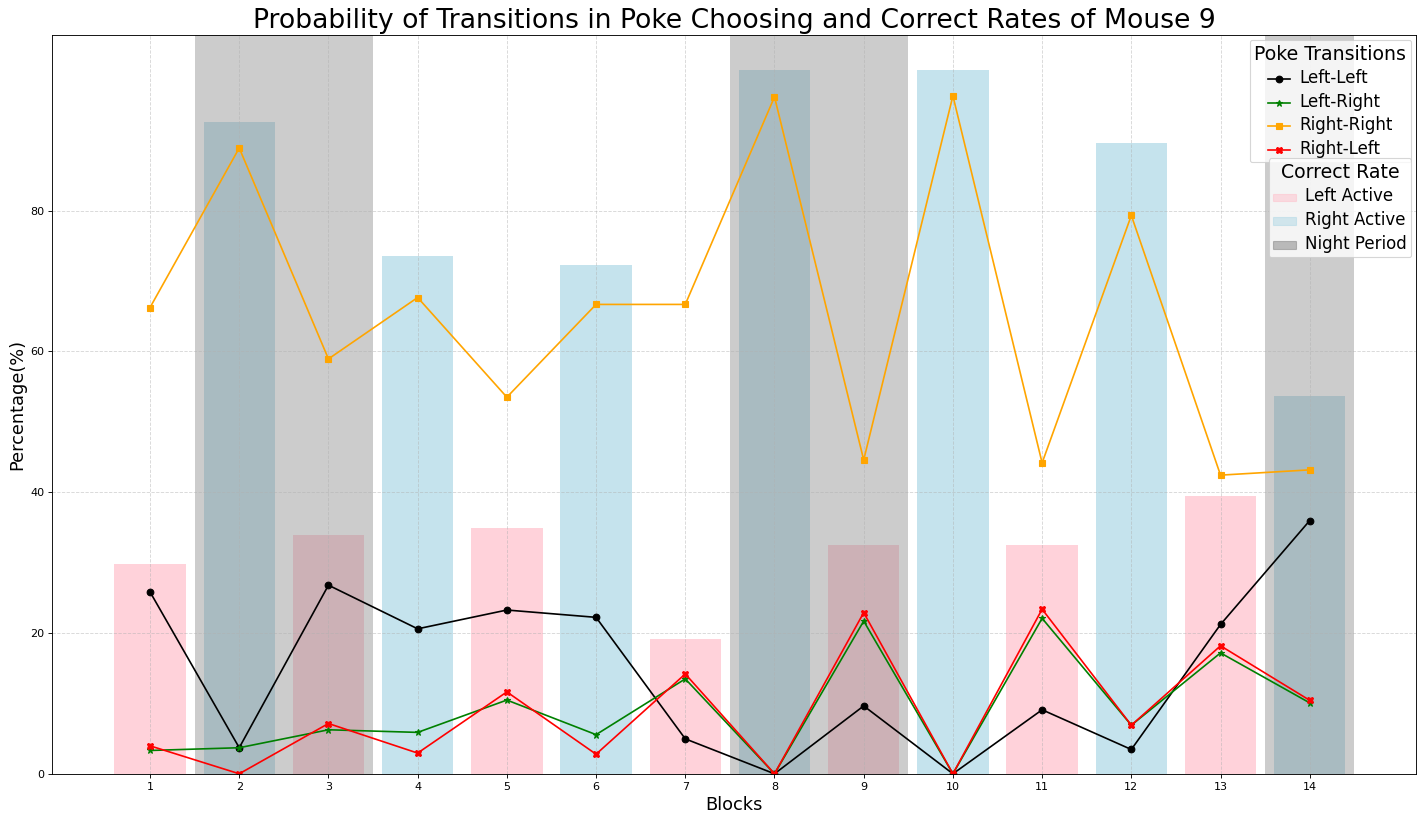

In [4]:
veh_scores = []

for path in paths.reversal_veh:
    data_dropped = read_csv_clean(path, remove_trivial=False)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_tranition_stats(data_stats, blocks, path)
    diff, left_start = dit.get_difference_key(data_stats)
    veh_scores.append(dit.learning_score_grad(diff, left_start))

In [5]:
print(fent_scores)
print(veh_scores)

[117.08, 0, 328.58000000000004, 1304.0800000000002, 393.40999999999997]
[731.18, 373.73999999999995, 555.1700000000001, 356.49, 426.22]


In [6]:
import intervals as invs

In [7]:
invs.perform_T_test(fent_scores, veh_scores, test_side='two-sided')

P Value is  0.809449473060339
There is no significant difference between the two groups.
